In [1]:
import os
import matplotlib as plt
from matplotlib import pyplot as plt

import pandas as pd
import re
from scipy import signal

In [2]:
%matplotlib widget

In [3]:
expList = os.listdir("Logs")
exp = expList[0]

In [4]:
files = os.listdir("logs/{}".format(exp))

In [5]:
def smooth(x):
    global last
    smoothed = last * weight + (1 - weight) * x
    last = smoothed
    return smoothed

In [6]:
files

['FeedForward', 'Residual']

In [7]:
# for exp in expList:
#     files = os.listdir("logs/{}".format(exp))

#     fig_adam = plt.figure()
#     ax_adam = fig_adam.subplots()

#     fig_lfbgfs = plt.figure()
#     ax_lfbgfs = fig_lfbgfs.subplots()

#     adam_df = pd.read_csv("Logs/{}/FeedForward/adam.csv".format(exp))

    
#     lfbfgs_df = pd.read_csv("Logs/{}/FeedForward/l-bfgs.csv".format(exp))

Logs/Heat_1/FeedForward/adam.csv
Logs/Heat_1/Residual/adam.csv
Logs/Heat_1/FeedForward/l-bfgs.csv
Logs/Heat_1/Residual/l-bfgs.csv
Logs/Heat_2/FeedForward/adam.csv
Logs/Heat_2/Residual/adam.csv
Logs/Heat_2/FeedForward/l-bfgs.csv
Logs/Heat_2/Residual/l-bfgs.csv
Logs/laplace/FeedForward/adam.csv
Logs/laplace/Residual/adam.csv
Logs/laplace/FeedForward/l-bfgs.csv
Logs/laplace/Residual/l-bfgs.csv
Logs/Wave/FeedForward/adam.csv
Logs/Wave/Residual/adam.csv
Logs/Wave/FeedForward/l-bfgs.csv
Logs/Wave/Residual/l-bfgs.csv


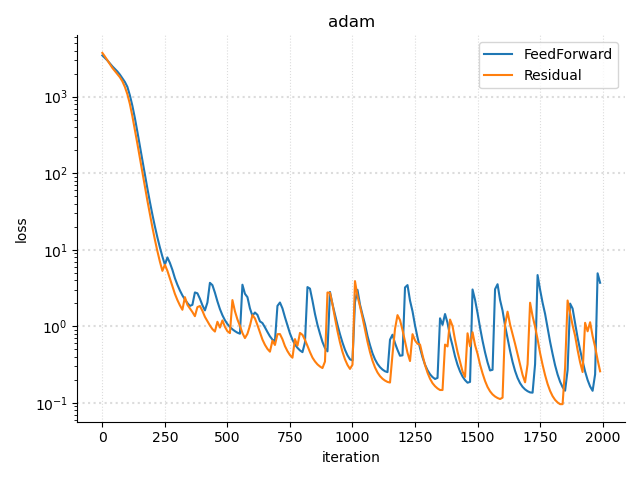

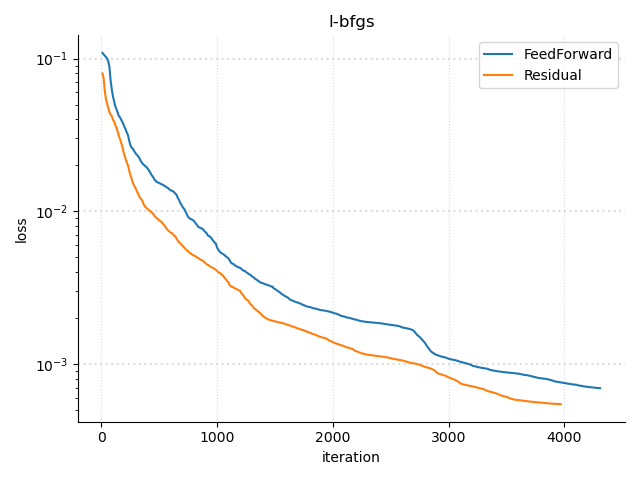

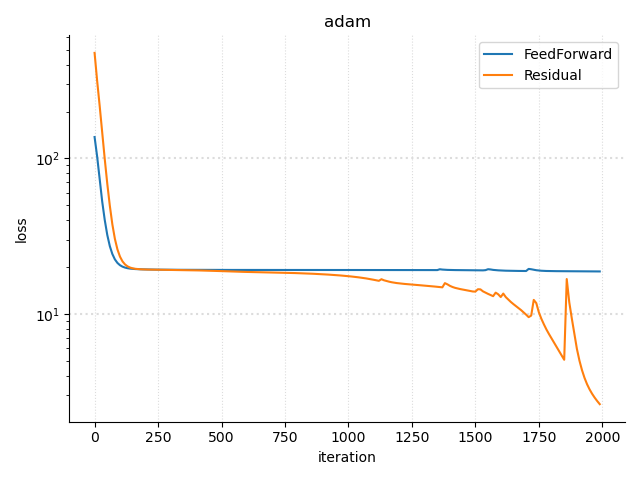

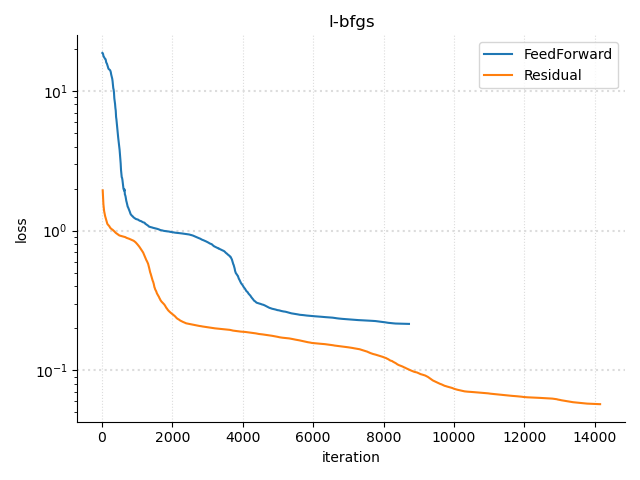

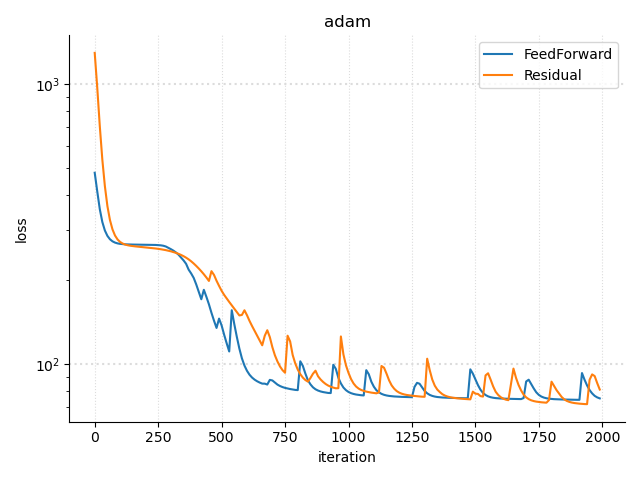

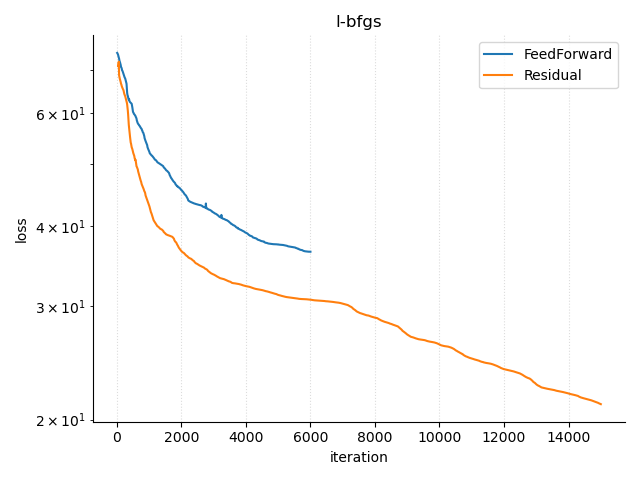

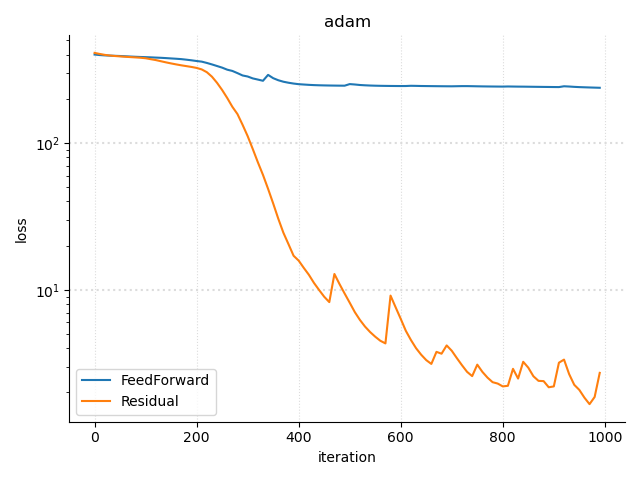

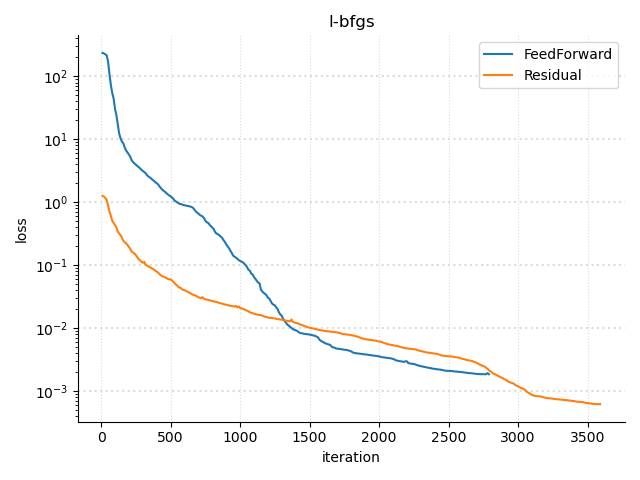

In [10]:
for exp in expList:
    # files = os.listdir("logs/{}/FeedForward".format(exp))

    models = os.listdir("logs/{}".format(exp))

    for opt in ["adam", "l-bfgs"]:
        fig = plt.figure()
        ax = fig.subplots()
        ax.set_title(opt)

        for model in models:
            df = pd.read_csv("Logs/{}/{}/{}.csv".format(exp, model, opt))
            print("Logs/{}/{}/{}.csv".format(exp, model, opt))

            if opt == "adam":
                last = df.loc[0, 'Value']
                weight = 0.6
                df["Value"] = df["Value"].apply(smooth)

            # if model == "FeedForward":
            ax.plot(df["Step"], df["Value"], label=model)

            ax.set_yscale("log")

            ax.yaxis.grid(color='gainsboro', linestyle='dotted', linewidth=1.5)
            ax.xaxis.grid(color='gainsboro', linestyle='dotted', linewidth=0.8)

            ax.spines['right'].set_color('none')
            ax.spines['top'].set_color('none')

            ax.set_xlabel("iteration")
            ax.set_ylabel("loss")

            ax.legend()

        fig.tight_layout()

        fig.savefig(f'Figures/Loss/{exp}/{exp}_{opt}.png')

In [9]:
# for exp in expList:
#     files = os.listdir("logs/{}".format(exp))

#     fig_adam = plt.figure()
#     ax_adam = fig_adam.subplots()

#     fig_lfbgfs = plt.figure()
#     ax_lfbgfs = fig_lfbgfs.subplots()

#     for file in files:
#         split = re.split("_|\.", file)
        
#         if split[-1] == 'png':
#             continue

#         print("logs/{}/{}".format(exp, file))
#         df = pd.read_csv("logs/{}/{}".format(exp, file))

#         if split[0] == "adam":
#             ax = ax_adam
#             ax.set_yscale("log")

#             # df = df.rolling(window=5).mean()
#             # df["Value"] = df["Value"].ewm(com=0.9).mean()
#             # df["Value"], zi = signal.lfilter([1.-alpha], [1., -alpha], df["Value"], zi=zi)
#             last = df.loc[0, 'Value']
#             weight = 0.6
#             df["Value"] = df["Value"].apply(smooth)

#             split[0] = "Adam"
#             ax.set_title("Adam")

#         elif split[0] == "lfbfgs":
#             ax = ax_lfbgfs
#             ax.set_yscale("log")
#             split[0] = "L-BFGS"

#             print(last_x)
#             ax_super.plot(df["Step"] + last_x, df["Value"], label=split[1])

#         ax_super.set_yscale("log")
#         # ax_super.plot(df["Step"], df["Value"], label=split[1])

#         ax.set_title(split[0])
        
#         ax.plot(df["Step"], df["Value"], label=split[1])

#         ax.yaxis.grid(color='gainsboro', linestyle='dotted', linewidth=1.5)
#         ax.xaxis.grid(color='gainsboro', linestyle='dotted', linewidth=0.8)

#         ax.spines['right'].set_color('none')
#         ax.spines['top'].set_color('none')

#         ax.set_xlabel("iteration")
#         ax.set_ylabel("loss")

#         ax.legend()

#     fig_adam.tight_layout()
#     fig_lfbgfs.tight_layout()

#     # fig_adam.savefig(f'Logs/{exp}/adam.png')
#     # fig_lfbgfs.savefig(f'Logs/{exp}/lfbfgs.png')